Time is microsecond precision, seconds since the epoch

In [42]:
import datetime
import pickle as pk

from pyedflib import highlevel
import pandas as pd

In [43]:
import numpy as np

# write an edf file
signals = np.random.rand(5, 256*300)*200 # 5 minutes of random signal
channel_names = ['ch1', 'ch2', 'ch3', 'ch4', 'ch5']
signal_headers = highlevel.make_signal_headers(channel_names, sample_rate=256)
header = highlevel.make_header(patientname='patient_x', gender='Female')
highlevel.write_edf('edf_file.edf', signals, signal_headers, header)

True

In [44]:
signals, signal_headers, header = highlevel.read_edf('edf_file.edf')

Reading Channels: 100%|██████████| 5/5 [00:00<00:00, 297.18it/s]


In [45]:
idx = 0
datapaths = ['/home/nate/github/ssvep_test/win_exp1_ssvep/bluetooth/12_18/',
            '/home/nate/github/ssvep_test/win_exp1_ssvep/bluetooth/12_20/',
            '/home/nate/github/ssvep_test/win_exp1_ssvep/bluetooth/10_20/',
            '/home/nate/github/ssvep_test/win_exp1_ssvep/wifi/']
filenames = ['exp_1_12_18hz_data.csv',
           'exp_1_12_20hz_data.csv',
            'exp_1_1020hz_data.csv',
            'exp_1_12_20hz_data.csv']

In [46]:
df = pd.read_csv(datapaths[idx] + filenames[idx])
df = df.iloc[500:]
first_timestamp = df.iloc[0]['30']
with open(datapaths[idx] + 'first_timestamp.pk', 'wb') as f:
    pk.dump(first_timestamp, f)

In [47]:
# df = pd.read_csv('bt_data_clean.csv')

In [48]:
h = highlevel.make_header(technician='Nathan George',
                               recording_additional='',
                               patientname='',
                               patient_additional='',
                               patientcode='',
                               equipment='',
                               admincode='',
                               gender='M',
                               startdate=datetime.datetime(2020, 9, 18),
                               birthdate='')

In [49]:
type(h)

dict

In [50]:
# dict with conversion from number to 10-20 location
number_to_1020 = {1: 'Fp1',
                 2: 'Fp2',
                 3: 'C3',
                 4: 'C4',
                 5: 'T5',
                 6: 'T6',
                 7: 'O1',
                 8: 'O2',
                 9: 'F7',
                 10: 'F8',
                 11: 'F3',
                 12: 'F4',
                 13: 'T3',
                 14: 'T4',
                 15: 'P3',
                 16: 'P4'}

# signal_headers = [{'label': number_to_1020[i],
#            'dimension': 'uV',
#            'sample_rate': 125,
#            'physical_max': 1000000,
#            'physical_min': -1000000,
#            'digital_max': 1000000,
#            'digital_min': -1000000,
#            'transducer': 'dry_spiky_electrode',
#            'prefilter': ''} for i in range(1, 17)]

signal_headers = highlevel.make_signal_headers(list(number_to_1020.values()),
                                               sample_rate=125,
                                               physical_max=500000,
                                               physical_min=-500000,
                                               # important note: if these values are too large,
                                               # it will not save properly
                                               digital_max=32000,
                                               digital_min=-32000)

# header = {'technician': 'Nathan George',
#             'recording_additional': '',
#             'patientname': '',
#             'patient_additional': '',
#             'patientcode': '',
#             'equipment': '',
#             'admincode': '',
#             'gender': 'M',
#             'startdate': datetime.datetime(2020, 9, 18),
#             'birthdate': '',
#              'annotations': []}

header = highlevel.make_header(technician='Nathan George',
                               gender='Male',
                               startdate=datetime.datetime(2020, 9, 18))

In [51]:
df[[str(i) for i in range(1, 17)]].values.T.shape

(16, 32445)

In [52]:
highlevel.write_edf('/home/nate/github/ssvep_test/win_exp1_ssvep/bluetooth/12_20/edf_data.edf',
                            signals=df[[str(i) for i in range(1, 17)]].values.T,
                             signal_headers=signal_headers,
                             header=header
#                             file_type=1  # EDF+
                            )

True

In [53]:
signals, signal_headers, header = highlevel.read_edf('/home/nate/github/ssvep_test/win_exp1_ssvep/bluetooth/12_20/edf_data.edf')

Reading Channels: 100%|██████████| 16/16 [00:00<00:00, 523.34it/s]


In [84]:
1/125

0.008

In [85]:
datetime.datetime.fromtimestamp(df['30'].iloc[0])

datetime.datetime(2020, 9, 18, 10, 55, 32, 32203)

In [86]:
df['30'].iloc[1125] - df['30'].iloc[1000]

1.441131830215454

In [87]:
df['30'].iloc[0]

1600448132.0322027

In [88]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,30,frequency
500,50133.957031,23101.912109,71132.476562,122884.992188,182373.671875,128562.734375,137360.453125,79128.031250,110707.492188,123340.070312,...,115064.656250,78357.320312,92015.000000,127954.500000,136885.187500,0.084,0.98,0.228,1.600448e+09,0
501,50022.351562,23006.984375,70926.507812,122860.117188,182370.062500,128478.382812,137323.687500,79110.468750,110798.914062,123521.281250,...,115111.054688,78449.789062,92070.367188,127979.468750,136902.890625,0.084,0.98,0.228,1.600448e+09,0
502,50141.777344,23112.574219,71140.414062,122891.695312,182360.406250,128584.687500,137358.109375,79127.250000,110702.640625,123347.203125,...,115065.882812,78357.390625,92014.976562,127950.570312,136884.968750,0.084,0.98,0.228,1.600448e+09,0
503,50015.042969,23008.996094,70899.890625,122856.781250,182366.062500,128458.664062,137309.828125,79110.531250,110788.921875,123510.171875,...,115114.851562,78448.179688,92070.562500,127983.468750,136911.812500,0.086,0.98,0.227,1.600448e+09,0
504,50153.265625,23121.984375,71163.726562,122906.765625,182363.406250,128607.148438,137360.265625,79133.445312,110736.171875,123368.570312,...,115074.171875,78365.882812,92021.343750,127961.382812,136891.781250,0.086,0.98,0.227,1.600448e+09,0


In [89]:
df['30'].diff()

500           NaN
501      0.000006
502      0.000007
503      0.000007
504      0.000006
           ...   
32942    0.000010
32943    0.000009
32944    0.000010
32945    0.000009
32946    0.000009
Name: 30, Length: 32447, dtype: float64

In [90]:
df['30'].diff().mean()

0.0079812577934291

In [91]:
1/1000

0.001

In [92]:
pd.to_datetime(df['30'], unit='s')

500     2020-09-18 16:55:32.032202720
501     2020-09-18 16:55:32.032209158
502     2020-09-18 16:55:32.032215834
503     2020-09-18 16:55:32.032222509
504     2020-09-18 16:55:32.032228708
                     ...             
32942   2020-09-18 16:59:50.992057085
32943   2020-09-18 16:59:50.992065907
32944   2020-09-18 16:59:50.992075682
32945   2020-09-18 16:59:50.992084503
32946   2020-09-18 16:59:50.992093086
Name: 30, Length: 32447, dtype: datetime64[ns]

<AxesSubplot:>

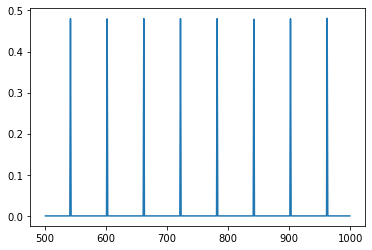

In [93]:
df['30'].diff().iloc[:500].plot()

In [97]:
df[df['30'].diff() > 0.3]['30'].diff()

542           NaN
602      0.480146
662      0.480844
722      0.480598
782      0.480669
           ...   
32647    0.480788
32707    0.480563
32767    0.479807
32827    0.481102
32887    0.479572
Name: 30, Length: 539, dtype: float64

In [94]:
df['30'].diff().max()

0.48319458961486816

In [79]:
df.iloc[df['30'].diff().argmax()]['30']

1600447995.063879

In [76]:
df.iloc[df['30'].diff().argmax() - 1]['30']

1600447994.5784173

In [80]:
df.iloc[df['30'].diff().argmax() - 2]['30']

1600447994.5784106

In [ ]:
def convert_data_to_edf():
    